In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# EDA Process

In [5]:
# checking for null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
# checking data types
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.shape

(50, 5)

In [10]:
# Duplicate rows
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [11]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [12]:
# rename columns
data.rename({'R&D Spend':'R&D_Spend', 'Marketing Spend':'Marketing_Spend'}, axis = 1, inplace = True)

In [13]:
data.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# correlation

In [14]:
# correlation
data.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8256\1993488580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D_Spend,Administration,Marketing_Spend,Profit
R&D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


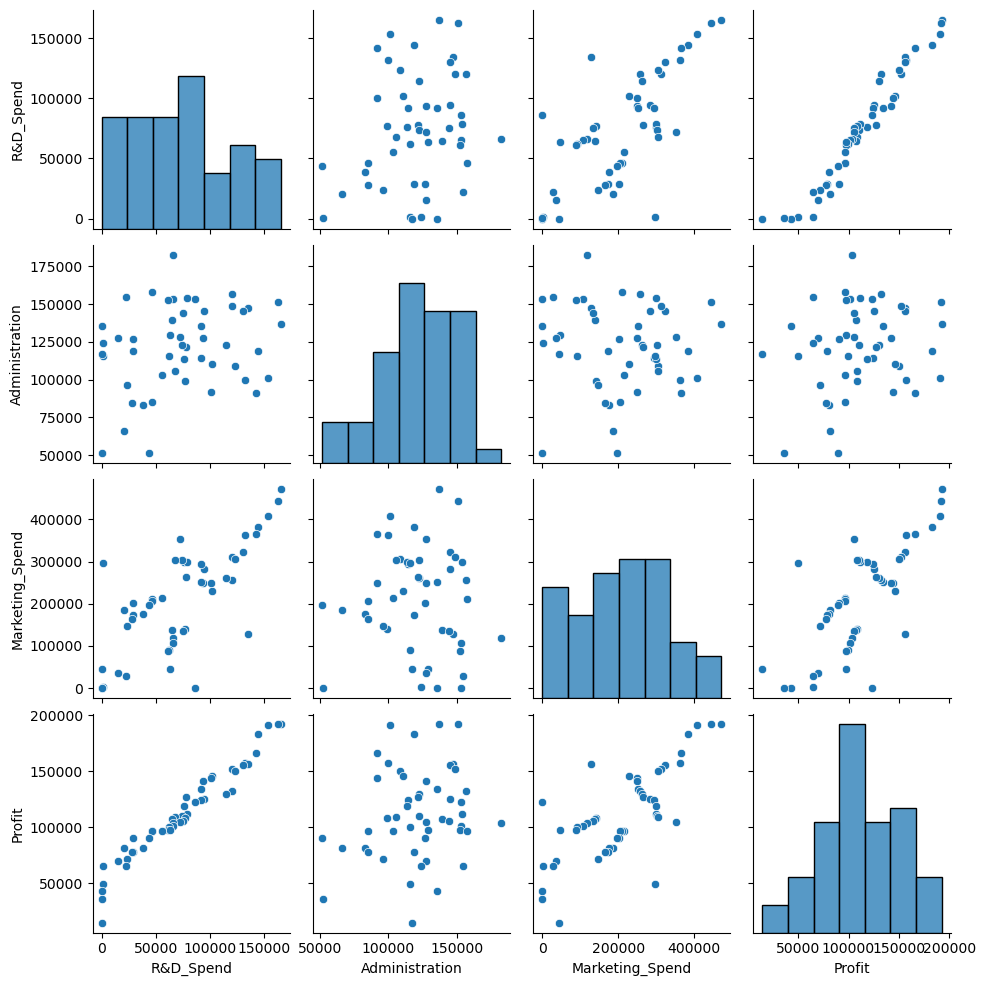

In [15]:
sns.pairplot(data= data)

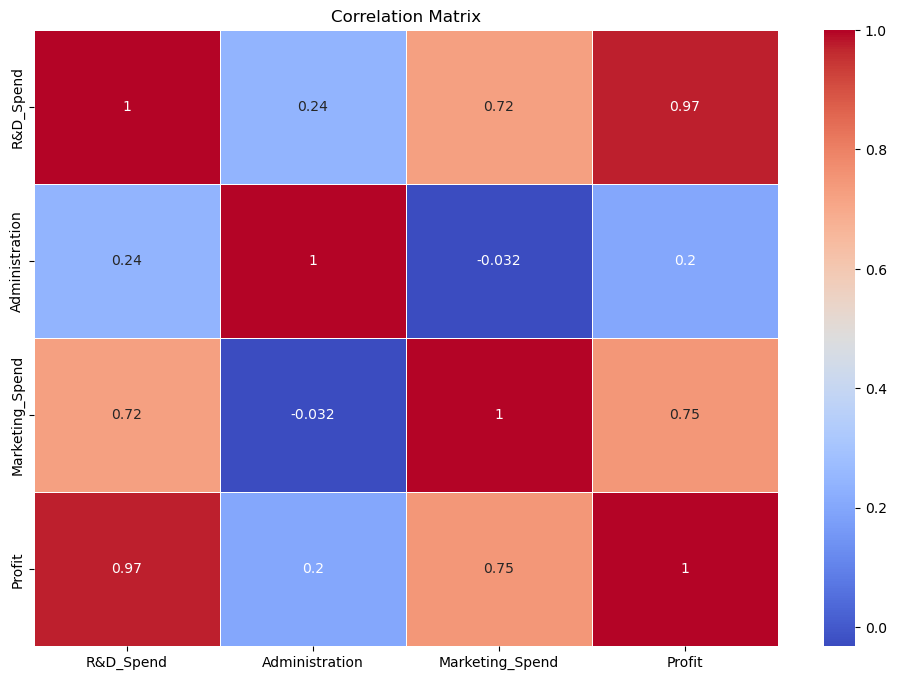

In [16]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [17]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [18]:
data.columns

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

# visualizing outliers

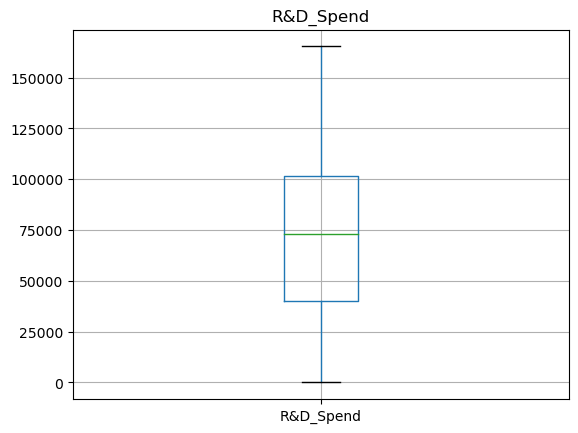

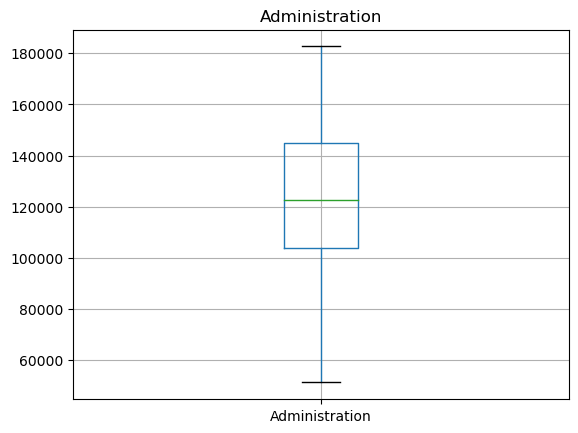

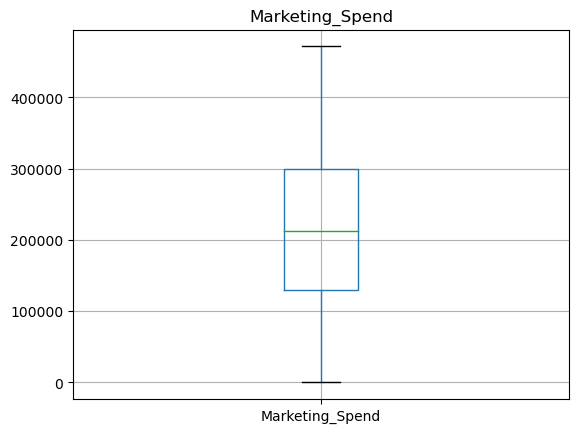

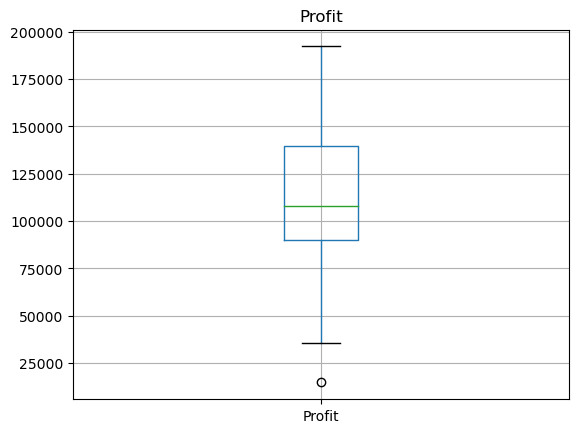

In [19]:
# outliers detection
numeric_columns = data[['R&D_Spend', 'Administration', 'Marketing_Spend','Profit']]
for feature in numeric_columns:
    data1=data.copy()  
    data1.boxplot(column=feature)
    plt.title(feature)
    plt.show()

# Treating outliers with IQR

In [20]:
# treating outliers with IQR
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
IQR = q3-q1

upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)

In [21]:
#detect outliers
data[(data['Profit'] > upper_bound) | (data['Profit'] < lower_bound)]

,R&D_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [22]:
new_data = data[(data['Profit'] < upper_bound) & (data['Profit'] > lower_bound)]
new_data

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [23]:
new_data = data.copy()
new_data.loc[(new_data['Profit'] > upper_bound), 'Profit'] = upper_bound
new_data.loc[(new_data['Profit'] < lower_bound), 'Profit'] = lower_bound
new_data

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<Axes: >

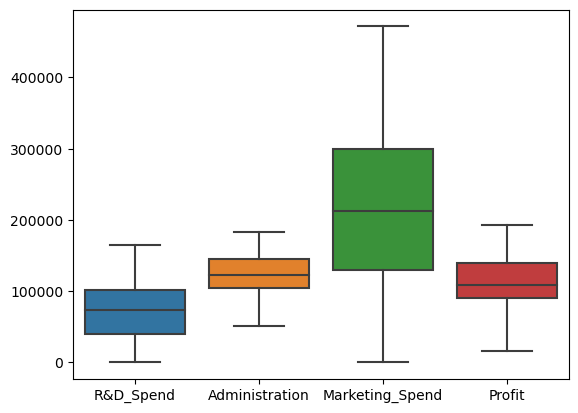

In [24]:
sns.boxplot(data = new_data)

# Labelencoder to convert categorical data into numeric

In [25]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
new_data['State'] = l.fit_transform(new_data['State'])
new_data.head()

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# feature scaling

In [26]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
new_data[['R&D_Spend','Administration','Marketing_Spend','Profit']] = s.fit_transform(new_data[['R&D_Spend','Administration','Marketing_Spend','Profit']])
new_data

,R&D_Spend,Administration,Marketing_Spend,State,Profit
0,2.016411,0.560753,2.153943,2,2.013185
1,1.955860,1.082807,1.923600,0,2.001397
2,1.754364,-0.728257,1.626528,1,1.982787
3,1.554784,-0.096365,1.422210,2,1.778319
4,1.504937,-1.079919,1.281528,1,1.358912
5,1.279800,-0.776239,1.254210,2,1.128136
6,1.340066,0.932147,-0.688150,0,1.106340
7,1.245057,0.871980,0.932186,1,1.097058
8,1.030369,0.986952,0.830887,2,1.008208
9,1.091819,-0.456640,0.776107,0,0.946685


# Model building

In [27]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~Administration+Marketing_Spend+State+Profit', data = new_data).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.822e+30
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:43:55   Log-Likelihood:                 1649.9
No. Observations:                  50   AIC:                            -3290.
Df Residuals:                      45   BIC:                            -3280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.18e-16   2.65e-16      0.444      0.659   -4.17e-16    6.53e-16
Administration  -1.249e-16   1.79e-16     -0.698      0.489   -4.86e-16    2.36e-16
Marketing_Spend -7.772e-16   2.64e-16     -2.941      0.005   -1.31e-15   -2.45e-16
State           -4.857e-17   2.05e-16     -0.237      0.814   -4.62e-16    3.65e-16
Profit              1.0000    2.7e-16    3.7e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        0.020   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.990   Jarque-Bera (JB):                0.127
Skew:                           0.044   Prob(JB):                        0.939
Kurtosis:                       2.769   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

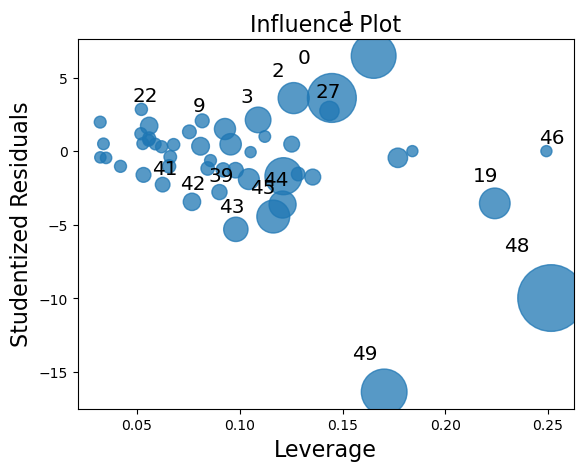

In [29]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)
plt.show()

In [30]:
print(model.rsquared)
print(model.rsquared_adj)

1.0
1.0


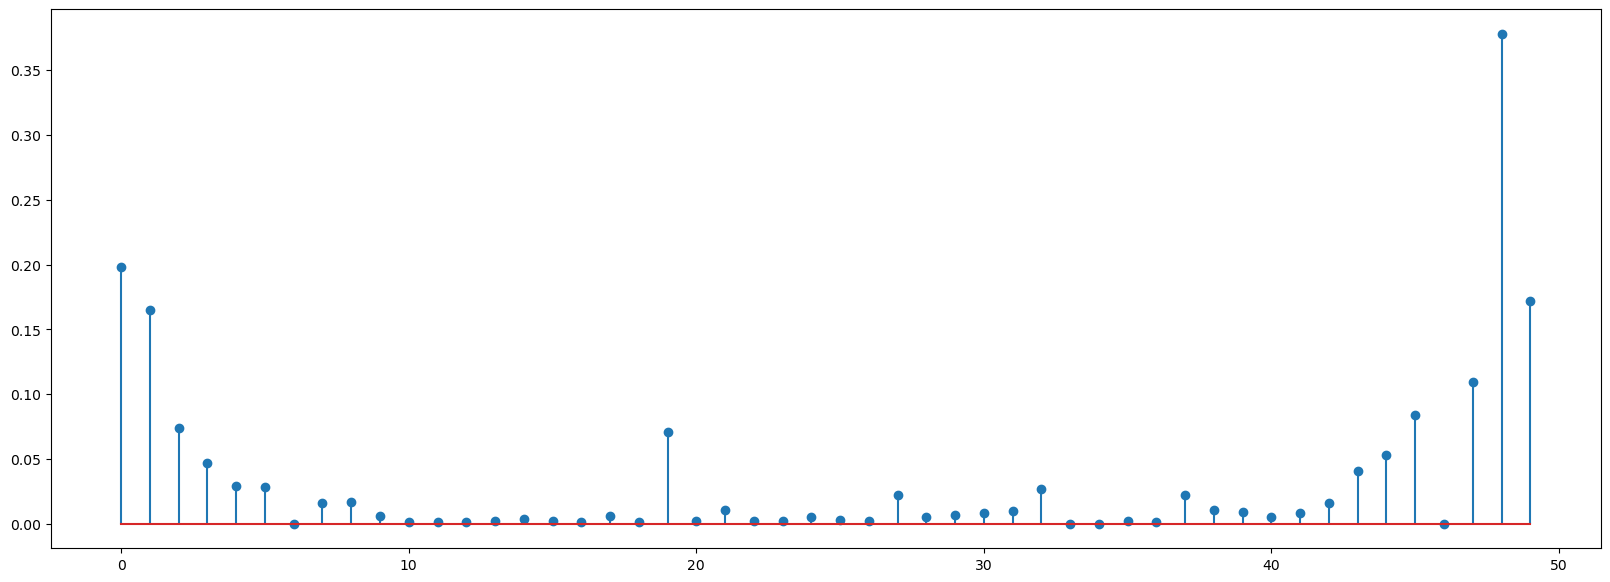

In [31]:
model_influence = model.get_influence()
(c_2, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c_2,3))
plt.show()

In [32]:
model1 = smf.ols('Profit~Administration', data = new_data).fit()

<Axes: xlabel='Administration', ylabel='Profit'>

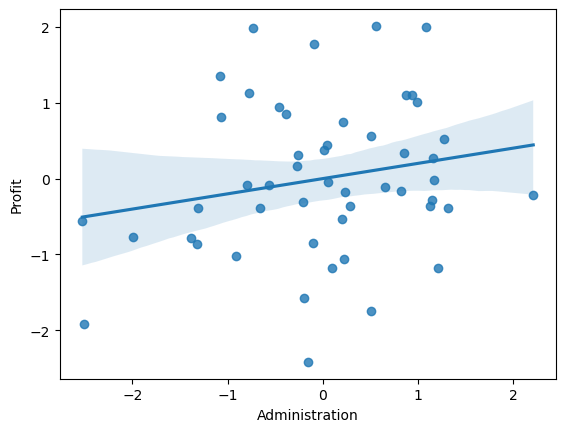

In [33]:
sns.regplot(x ='Administration', y = 'Profit', data = new_data)

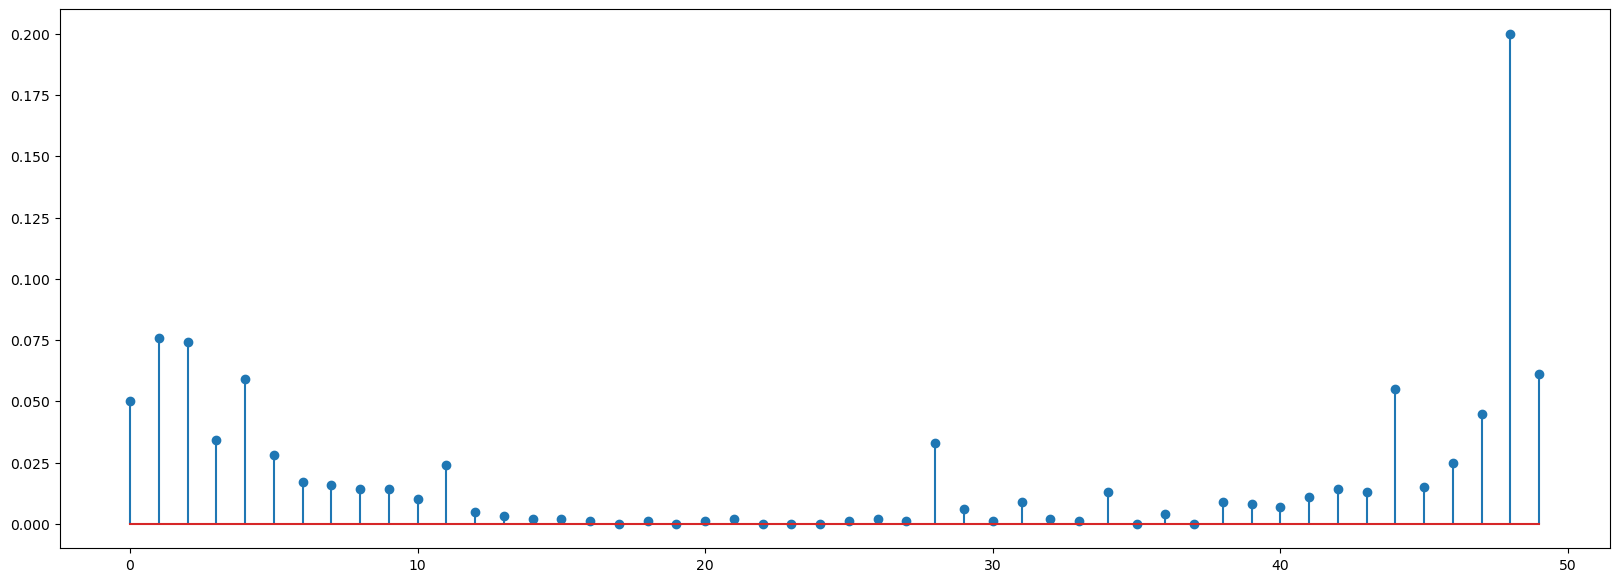

In [34]:
model_influence1 = model1.get_influence()
(c_2, _) = model_influence1.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c_2,3))
plt.show()

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.018
Date:                Wed, 15 Nov 2023   Prob (F-statistic):              0.162
Time:                        15:44:00   Log-Likelihood:                -69.917
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.608e-16      0.141  -2.55e-15      1.000      -0.284       0.284
Administration     0.2009      0.141      1.421      0.162      -0.083       0.485
==============================================================================
Omnibus:                        0.132   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.133
Skew:                           0.102   Prob(JB):                        0.936
Kurtosis:                       2.850   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model2 = smf.ols('Profit~Marketing_Spend', data = new_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.97
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           4.30e-10
Time:                        15:44:00   Log-Likelihood:                -50.451
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.608e-16      0.096  -3.77e-15      1.000      -0.193       0.193
Marketing_Spend     0.7480      0.096      7.808      0.000       0.555       0.941
==============================================================================
Omnibus:                        4.368   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                3.827
Skew:                          -0.330   Prob(JB):                        0.148
Kurtosis:                       4.184   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model3 = smf.ols('Profit~Administration+Marketing_Spend', data = new_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     36.78
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.43e-10
Time:                        15:44:00   Log-Likelihood:                -47.398
No. Observations:                  50   AIC:                             100.8
Df Residuals:                      47   BIC:                             106.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.608e-16      0.091  -3.96e-15      1.000      -0.183       0.183
Administration      0.2252      0.091      2.471      0.017       0.042       0.408
Marketing_Spend     0.7552      0.091      8.288      0.000       0.572       0.939
==============================================================================
Omnibus:                        6.514   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.449
Skew:                          -0.505   Prob(JB):                       0.0398
Kurtosis:                       4.440   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

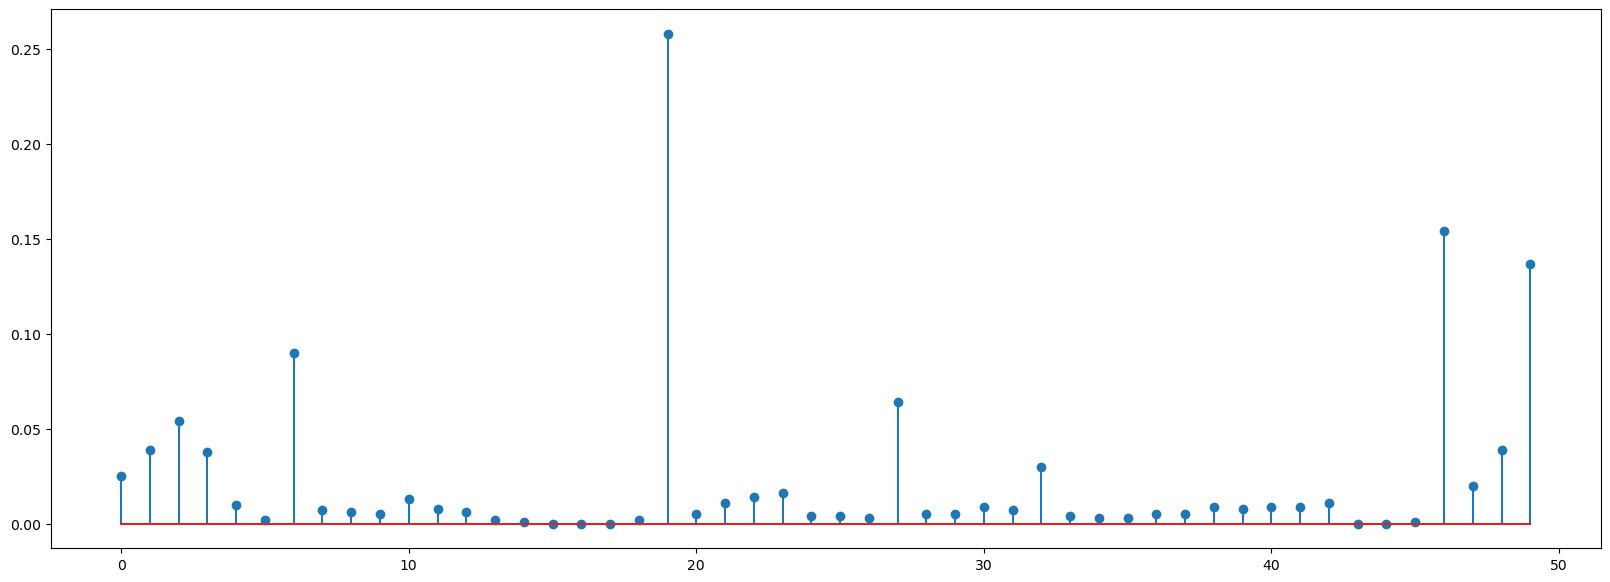

In [38]:
model_influence2 = model2.get_influence()
(c_2, _) = model_influence2.cooks_distance
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(new_data)),np.round(c_2,3))
plt.show()

# VIF calculation for multicolinearity

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = new_data[['R&D_Spend','Administration','Marketing_Spend']]
VIF_cal = pd.DataFrame()
VIF_cal['features'] = x.columns
VIF_cal['VIF'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [40]:
VIF_cal

,features,VIF
0,R&D_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773
